In [1]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from rich import print_json
from IPython.display import display
import seaborn
import geopandas

In [2]:
anneeMin=2017
anneeMax=2020

In [10]:
listeInstituts=["INC","INEE","INP","INSB","INSHS","INSIS","INSMI","INSU","INS2I","IN2P3"]
dfInstituts = pd.DataFrame(0,columns=listeInstituts,index=listeInstituts)

In [11]:
dfInstituts

,INC,INEE,INP,INSB,INSHS,INSIS,INSMI,INSU,INS2I,IN2P3
INC,0,0,0,0,0,0,0,0,0,0
INEE,0,0,0,0,0,0,0,0,0,0
INP,0,0,0,0,0,0,0,0,0,0
INSB,0,0,0,0,0,0,0,0,0,0
INSHS,0,0,0,0,0,0,0,0,0,0
INSIS,0,0,0,0,0,0,0,0,0,0
INSMI,0,0,0,0,0,0,0,0,0,0
INSU,0,0,0,0,0,0,0,0,0,0
INS2I,0,0,0,0,0,0,0,0,0,0
IN2P3,0,0,0,0,0,0,0,0,0,0


In [90]:
def analyseInstituts (nomFichier, nomColonne='SIG_INST__MultiInst'):
    df = pd.read_csv(nomFichier, sep=";")
    df[nomColonne] = df[nomColonne].str.replace(' ','')
    dummies = pd.get_dummies(df[nomColonne])
    sommeCombinaison = dummies.sum()
    #sommeCombinaison.sort_values(ascending=False)
    dfDummiesInst = df[nomColonne].str.get_dummies(sep=';')
    sommeInstituts = dfDummiesInst.sum()
    return sommeCombinaison, sommeInstituts

In [179]:
for annee in range(anneeMin,anneeMax+1):
    nomFichier = "WOS/Corpus WoS INS2I "+str(annee)+".csv"
    if annee==2017:
        a,b = analyseInstituts(nomFichier)
        syntheseCombinaison = pd.DataFrame(a, columns=[2017])
    else:
        if annee==2018 :
            a, b = analyseInstituts(nomFichier, 'CNRS - Institut')
        else :
            a, b = analyseInstituts(nomFichier, 'SIG_INST_MultiInst')
        dfAux = pd.DataFrame(a, columns=[annee])
        syntheseCombinaison = pd.concat([syntheseCombinaison,dfAux],axis=1)
syntheseCombinaison.fillna(0, inplace=True)

In [180]:
syntheseCombinaison = syntheseCombinaison.astype('int')

In [181]:
syntheseCombinaison.loc["Total"] = syntheseCombinaison.sum()

In [182]:
syntheseCombinaison['Total']=syntheseCombinaison.sum(axis=1)

In [183]:
synthese = syntheseCombinaison.sort_values(by='Total', ascending=False)
synthese.rename({"INS2I":"INS2I seul"}, axis=0)

,2017,2018,2019,2020,Total
Total,4280,3883,4024,3840,16027
INS2I seul,2924,2529,2580,2393,10426
INS2I;INSIS,723,291,318,706,2038
INS2I;INSB;INSIS,75,269,269,81,694
INS2I;INSB;INSIS;INSU,0,226,267,0,493
...,...,...,...,...,...
IN2P3;INEE;INS2I,0,0,1,0,1
INEE;INS2I;INSIS;INSU,1,0,0,0,1
INEE;INS2I;INSB;INSHS;INSIS,0,1,0,0,1
INS2I;INSB;INSU,1,0,0,0,1


Text(0.5, 1.0, 'Publications INS2I')

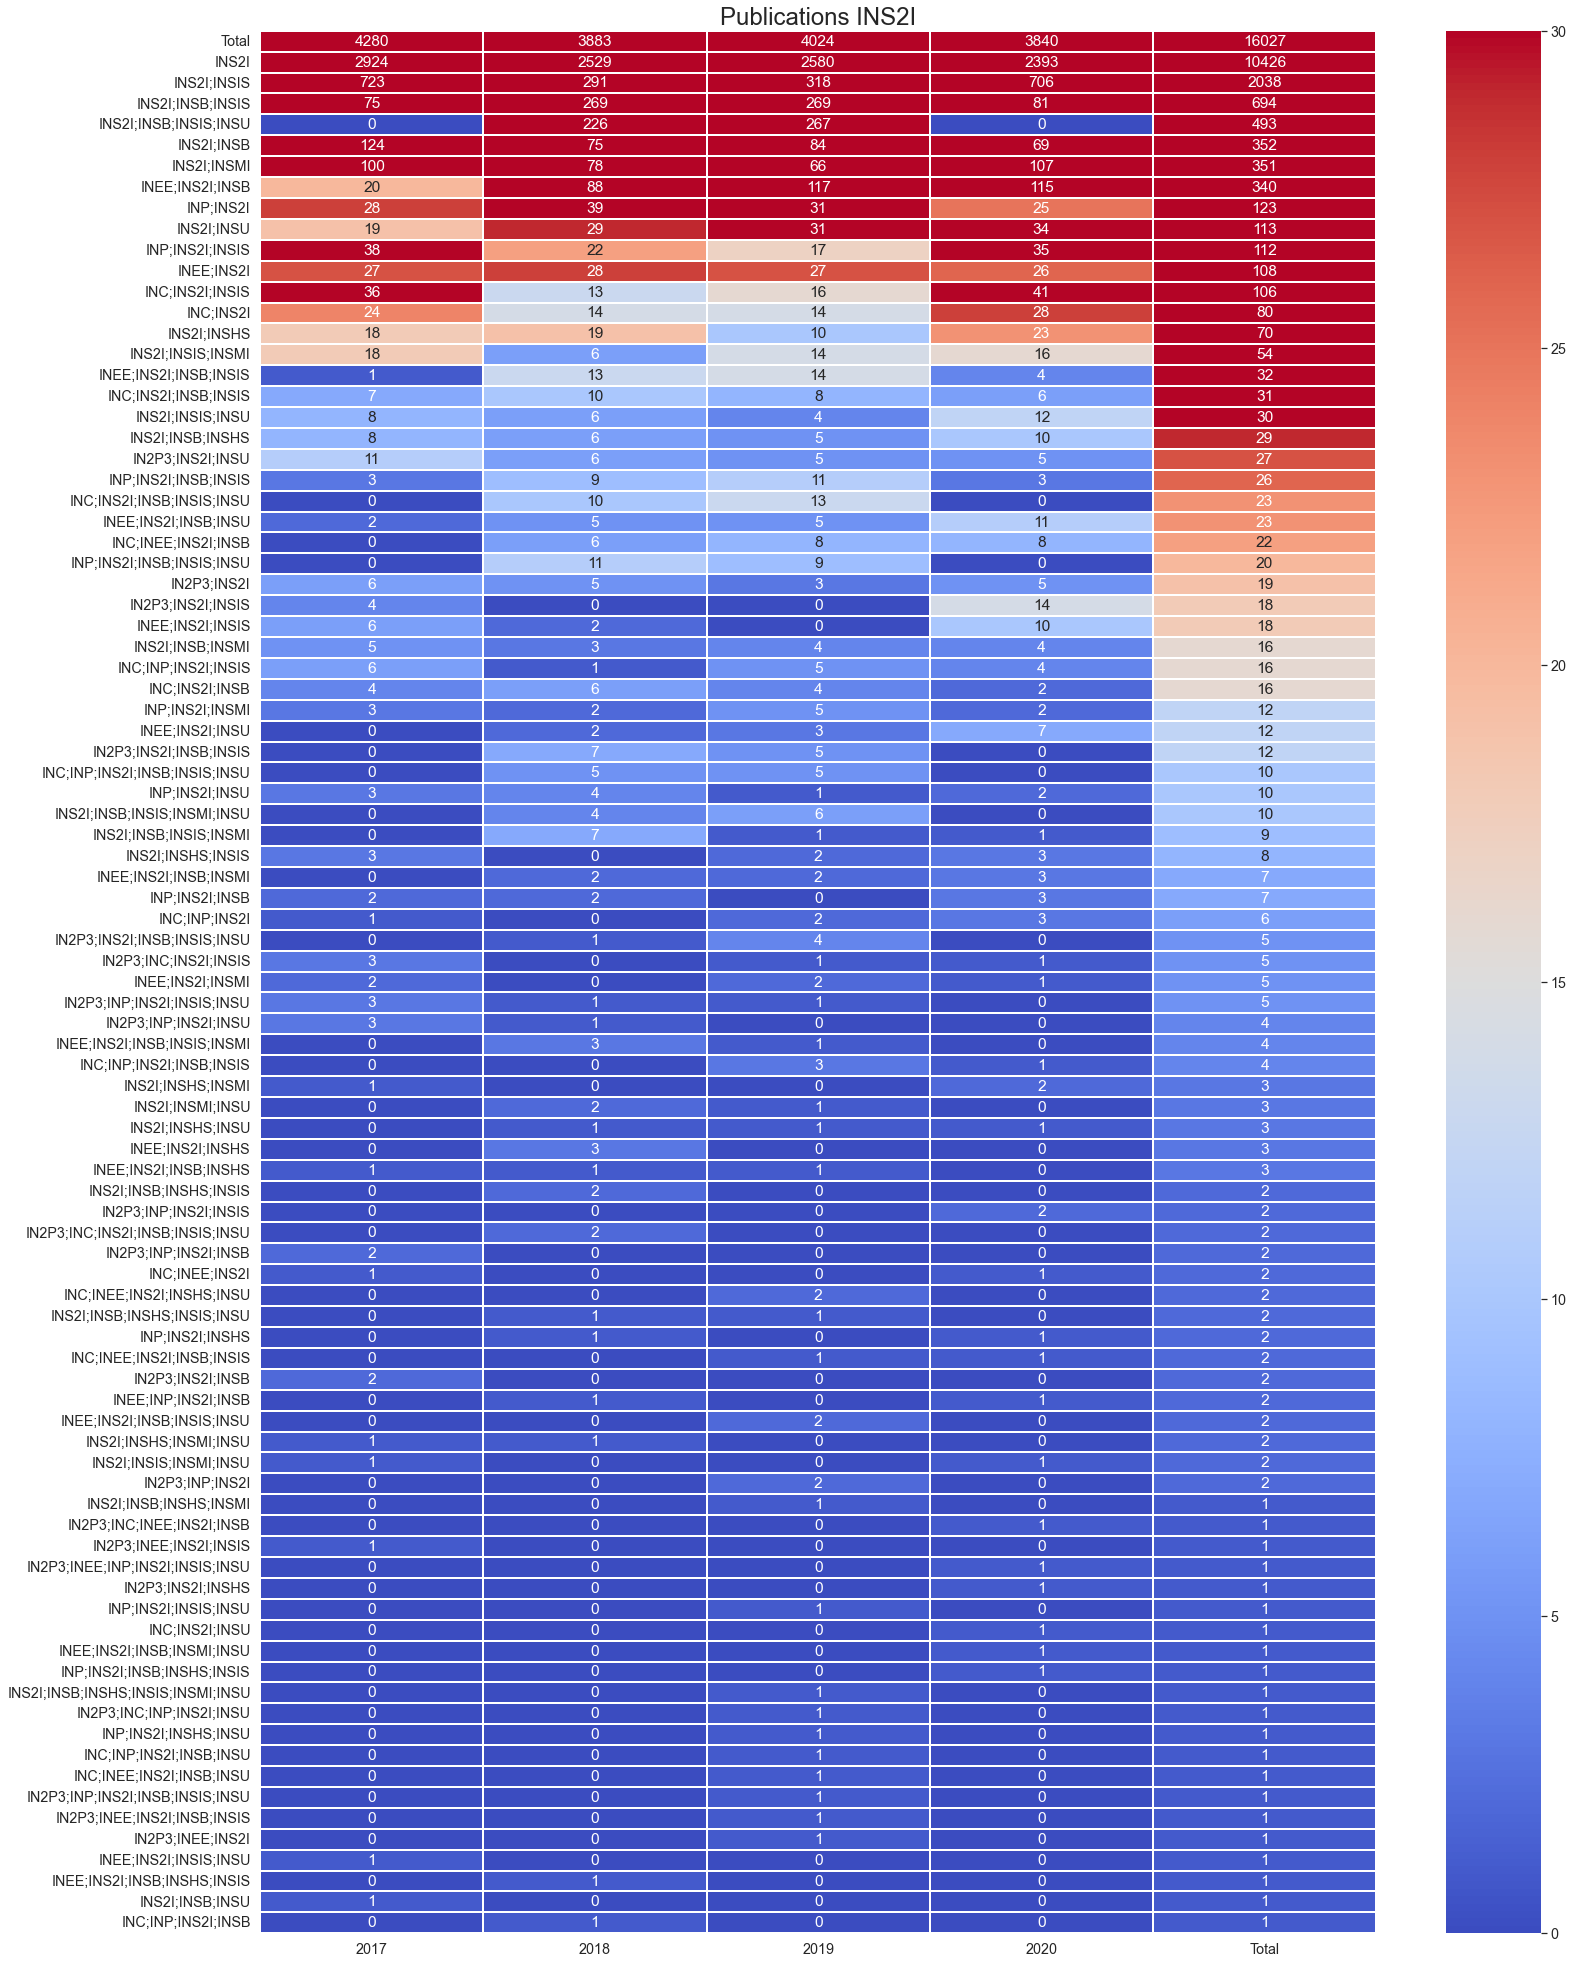

In [185]:
import seaborn as sns
from matplotlib.patches import Rectangle
plt.figure(figsize=(25,35))
sns.set(font_scale = 1.3)
ax = sns.heatmap(synthese, cmap ='coolwarm', linewidths = 0.30, annot = True, vmax=30, fmt='d')
ax.set_title("Publications INS2I", fontsize=24)

In [107]:
a, b = analyseInstituts("WOS/Corpus WoS INS2I 2017.csv")
print(a)
print(b)

IN2P3;INC;INS2I;INSIS            3
IN2P3;INEE;INS2I;INSIS           1
IN2P3;INP;INS2I;INSB             2
IN2P3;INP;INS2I;INSIS;INSU       3
IN2P3;INP;INS2I;INSU             3
IN2P3;INS2I                      6
IN2P3;INS2I;INSB                 2
IN2P3;INS2I;INSIS                4
IN2P3;INS2I;INSU                11
INC;INEE;INS2I                   1
INC;INP;INS2I                    1
INC;INP;INS2I;INSIS              6
INC;INS2I                       24
INC;INS2I;INSB                   4
INC;INS2I;INSB;INSIS             7
INC;INS2I;INSIS                 36
INEE;INS2I                      27
INEE;INS2I;INSB                 20
INEE;INS2I;INSB;INSHS            1
INEE;INS2I;INSB;INSIS            1
INEE;INS2I;INSB;INSU             2
INEE;INS2I;INSIS                 6
INEE;INS2I;INSIS;INSU            1
INEE;INS2I;INSMI                 2
INP;INS2I                       28
INP;INS2I;INSB                   2
INP;INS2I;INSB;INSIS             3
INP;INS2I;INSIS                 38
INP;INS2I;INSMI     

In [108]:
syntheseCombinaison = pd.DataFrame(a, columns=[2017])
syntheseCombinaison

,2017
IN2P3;INC;INS2I;INSIS,3
IN2P3;INEE;INS2I;INSIS,1
IN2P3;INP;INS2I;INSB,2
IN2P3;INP;INS2I;INSIS;INSU,3
IN2P3;INP;INS2I;INSU,3
IN2P3;INS2I,6
IN2P3;INS2I;INSB,2
IN2P3;INS2I;INSIS,4
IN2P3;INS2I;INSU,11
INC;INEE;INS2I,1


In [109]:
a, b = analyseInstituts("WOS/Corpus WoS INS2I 2018.csv", 'CNRS - Institut')
dfAux = pd.DataFrame(a, columns=[2018])
syntheseCombinaison = pd.concat([syntheseCombinaison,dfAux],axis=1)
print(df2018)
print(b)


                                 2018
IN2P3;INC;INS2I;INSB;INSIS;INSU     2
IN2P3;INP;INS2I;INSIS;INSU          1
IN2P3;INP;INS2I;INSU                1
IN2P3;INS2I                         5
IN2P3;INS2I;INSB;INSIS              7
IN2P3;INS2I;INSB;INSIS;INSU         1
IN2P3;INS2I;INSU                    6
INC;INEE;INS2I;INSB                 6
INC;INP;INS2I;INSB                  1
INC;INP;INS2I;INSB;INSIS;INSU       5
INC;INP;INS2I;INSIS                 1
INC;INS2I                          14
INC;INS2I;INSB                      6
INC;INS2I;INSB;INSIS               10
INC;INS2I;INSB;INSIS;INSU          10
INC;INS2I;INSIS                    13
INEE;INP;INS2I;INSB                 1
INEE;INS2I                         28
INEE;INS2I;INSB                    88
INEE;INS2I;INSB;INSHS               1
INEE;INS2I;INSB;INSHS;INSIS         1
INEE;INS2I;INSB;INSIS              13
INEE;INS2I;INSB;INSIS;INSMI         3
INEE;INS2I;INSB;INSMI               2
INEE;INS2I;INSB;INSU                5
INEE;INS2I;I

In [110]:
a, b = analyseInstituts("WOS/Corpus WoS INS2I 2019.csv",'SIG_INST_MultiInst')
dfAux = pd.DataFrame(a, columns=[2019])
syntheseCombinaison = pd.concat([syntheseCombinaison, dfAux], axis=1)
print(b)

IN2P3      25
INC        85
INEE      188
INP        97
INS2I    4024
INSB      856
INSHS      25
INSIS    1002
INSMI     104
INSU      368
dtype: int64


In [111]:
a, b = analyseInstituts("WOS/Corpus WoS INS2I 2020.csv",'SIG_INST_MultiInst')
dfAux = pd.DataFrame(a, columns=[2020])
syntheseCombinaison = pd.concat([syntheseCombinaison, dfAux], axis=1)
print(b)

IN2P3      30
INC        98
INEE      191
INP        84
INS2I    3840
INSB      326
INSHS      42
INSIS     944
INSMI     138
INSU       76
dtype: int64


In [112]:
syntheseCombinaison

,2017,2018,2019,2020
IN2P3;INC;INS2I;INSIS,3.0,NaN,1.0,1.0
IN2P3;INEE;INS2I;INSIS,1.0,NaN,NaN,NaN
IN2P3;INP;INS2I;INSB,2.0,NaN,NaN,NaN
IN2P3;INP;INS2I;INSIS;INSU,3.0,1.0,1.0,NaN
IN2P3;INP;INS2I;INSU,3.0,1.0,NaN,NaN
...,...,...,...,...
IN2P3;INP;INS2I;INSIS,NaN,NaN,NaN,2.0
IN2P3;INS2I;INSHS,NaN,NaN,NaN,1.0
INC;INS2I;INSU,NaN,NaN,NaN,1.0
INEE;INS2I;INSB;INSMI;INSU,NaN,NaN,NaN,1.0


In [5]:
#nomFichier = "WOS/WOSINS2I20172020.csv"
nomFichier = "WOS/Corpus WoS INS2I "+str(anneeMin)+".csv"
df = pd.read_csv(nomFichier, sep=";")

In [33]:
df.head(15)

,UT,INIST_Identifiant,INIST_UTs,BSO_Identifiant,INIST_DI,BSO_doi,DOI_C,Comparaison,BSO_is_oa,BSO_source_is_oa,...,SAPPS_JNAL,SO,NotoriÃ©tÃ©,CNRS,SIG_INST_MonoInst,SIG_INST__MultiInst,WoS_TI,BSO_Title,TypeDoc,Type de revue
0,WOS:000382426700008,INIST_101762,WOS:000382426700008,BSO_099851,NaN,10.1007/978-3-319-11520-7_15,10.1007/978-3-319-11520-7_15,3 - WoS / BSO - ErronÃ©,OA - Inconnu,OA - Inconnu,...,JOURNAL OF CELLULAR AUTOMATA,JOURNAL OF CELLULAR AUTOMATA,1 - MÃ©diocre,Oui,INS2I,INS2I,Finitization of Infinite Field-based Multi-gen...,Experimental Finitization of Infinite Field-Ba...,Article,NaN
1,WOS:000384038500002,INIST_070748,WOS:000384038500002,BSO_022990,10.1016/j.jcss.2016.02.004,10.1016/j.jcss.2016.02.004,10.1016/j.jcss.2016.02.004,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,JOURNAL OF COMPUTER AND SYSTEM SCIENCES,JOURNAL OF COMPUTER AND SYSTEM SCIENCES,3 - Correcte,Oui,INS2I,INS2I,A polytope-based approach to measure the impac...,A polytope-based approach to measure the impac...,Article,NaN
2,WOS:000384038500008,INIST_070747,WOS:000384038500008,BSO_022795,10.1016/j.jcss.2016.04.007,10.1016/j.jcss.2016.04.007,10.1016/j.jcss.2016.04.007,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,JOURNAL OF COMPUTER AND SYSTEM SCIENCES,JOURNAL OF COMPUTER AND SYSTEM SCIENCES,3 - Correcte,Oui,INS2I,INS2I,Optimal constructions for active diagnosis,Optimal constructions for active diagnosis,Article,NaN
3,WOS:000384527800011,INIST_053525,WOS:000384527800011,BSO_000627,10.1080/00207721.2016.1160454,10.1080/00207721.2016.1160454,10.1080/00207721.2016.1160454,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,INTERNATIONAL JOURNAL OF SYSTEMS SCIENCE,INTERNATIONAL JOURNAL OF SYSTEMS SCIENCE,4 - Excellente,Oui,INS2I,INS2I,Fault-tolerant continuous flow systems modelling,Fault-tolerant continuous flow systems modelling,Article,NaN
4,WOS:000384672600017,INIST_043128,WOS:000384672600017,BSO_000621,10.1111/itor.12275,10.1111/itor.12275,10.1111/itor.12275,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,INTERNATIONAL TRANSACTIONS IN OPERATIONAL RESE...,INTERNATIONAL TRANSACTIONS IN OPERATIONAL RESE...,4 - Excellente,Oui,INS2I,INS2I,Characterizing N plus -perfect line graphs,Characterizing N+-perfect line graphs,Article,NaN
5,WOS:000384672600018,INIST_043125,WOS:000384672600018,BSO_001390,10.1111/itor.12307,10.1111/itor.12307,10.1111/itor.12307,1 - WoS / BSO - OK,OA - Non,OA - Non,...,INTERNATIONAL TRANSACTIONS IN OPERATIONAL RESE...,INTERNATIONAL TRANSACTIONS IN OPERATIONAL RESE...,4 - Excellente,Oui,INS2I,INS2I,On star and biclique edge-colorings,On star and biclique edge-colorings,Article,NaN
6,WOS:000384857500021,INIST_076567,WOS:000384857500021,BSO_010946,10.1016/j.ejor.2016.06.038,10.1016/j.ejor.2016.06.038,10.1016/j.ejor.2016.06.038,1 - WoS / BSO - OK,OA - Non,OA - Non,...,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,4 - Excellente,Oui,INS2I,INS2I,Easy and optimal queries to reduce set uncerta...,Easy and optimal queries to reduce set uncerta...,Article,NaN
7,WOS:000385318300032,INIST_069679,WOS:000385318300032,BSO_011986,10.1016/j.jmatprotec.2016.08.036,10.1016/j.jmatprotec.2016.08.036,10.1016/j.jmatprotec.2016.08.036,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,JOURNAL OF MATERIALS PROCESSING TECHNOLOGY,JOURNAL OF MATERIALS PROCESSING TECHNOLOGY,4 - Excellente,Oui,INS2I,INS2I,Dynamic recrystallization behaviour of spheroi...,Dynamic recrystallization behaviour of spheroi...,Article,NaN
8,WOS:000385339200011,INIST_028270,WOS:000385339200011,BSO_010424,10.1016/j.ejc.2016.08.005,10.1016/j.ejc.2016.08.005,10.1016/j.ejc.2016.08.005,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,EUROPEAN JOURNAL OF COMBINATORICS,EUROPEAN JOURNAL OF COMBINATORICS,3 - Correcte,Oui,INS2I,INS2I,First order convergence of matroids,First order convergence of matroids,Article,NaN
9,WOS:000385477000011,INIST_070720,WOS:000385477000011,BSO_017477,10.1016/j.jcta.2016.08.001,10.1016/j.jcta.2016.08.001,10.1016/j.jcta.2016.08.001,1 - WoS / BSO - OK,OA - Oui,OA - Non,...,JOU

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UT                   4280 non-null   object
 1   INIST_Identifiant    4270 non-null   object
 2   INIST_UTs            4270 non-null   object
 3   BSO_Identifiant      4265 non-null   object
 4   INIST_DI             3821 non-null   object
 5   BSO_doi              4167 non-null   object
 6   DOI_C                4167 non-null   object
 7   Comparaison          4280 non-null   object
 8   BSO_is_oa            4280 non-null   object
 9   BSO_source_is_oa     4280 non-null   object
 10  BSO_oa_host_type     4280 non-null   object
 11  BSO_publisher        4280 non-null   object
 12  Editeur              4280 non-null   object
 13  ISSN                 4117 non-null   object
 14  SAPPS_JNAL           4280 non-null   object
 15  SO                   4280 non-null   object
 16  Notori

In [52]:
#suppression des espaces séparant les noms des instituts dans la colonne SIG_INST__MultiInst
df['SIG_INST__MultiInst'] = df['SIG_INST__MultiInst'].str.replace(' ','')

In [62]:
dummies = pd.get_dummies(df['SIG_INST__MultiInst'])

In [63]:
dummies

,IN2P3;INC;INS2I;INSIS,IN2P3;INEE;INS2I;INSIS,IN2P3;INP;INS2I;INSB,IN2P3;INP;INS2I;INSIS;INSU,IN2P3;INP;INS2I;INSU,IN2P3;INS2I,IN2P3;INS2I;INSB,IN2P3;INS2I;INSIS,IN2P3;INS2I;INSU,INC;INEE;INS2I,...,INS2I;INSHS,INS2I;INSHS;INSIS,INS2I;INSHS;INSMI,INS2I;INSHS;INSMI;INSU,INS2I;INSIS,INS2I;INSIS;INSMI,INS2I;INSIS;INSMI;INSU,INS2I;INSIS;INSU,INS2I;INSMI,INS2I;INSU
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
somme = dummies.sum()

In [72]:
somme.sort_values(ascending=False)

INS2I                         2924
INS2I;INSIS                    723
INS2I;INSB                     124
INS2I;INSMI                    100
INS2I;INSB;INSIS                75
INP;INS2I;INSIS                 38
INC;INS2I;INSIS                 36
INP;INS2I                       28
INEE;INS2I                      27
INC;INS2I                       24
INEE;INS2I;INSB                 20
INS2I;INSU                      19
INS2I;INSHS                     18
INS2I;INSIS;INSMI               18
IN2P3;INS2I;INSU                11
INS2I;INSB;INSHS                 8
INS2I;INSIS;INSU                 8
INC;INS2I;INSB;INSIS             7
INC;INP;INS2I;INSIS              6
IN2P3;INS2I                      6
INEE;INS2I;INSIS                 6
INS2I;INSB;INSMI                 5
INC;INS2I;INSB                   4
IN2P3;INS2I;INSIS                4
INS2I;INSHS;INSIS                3
INP;INS2I;INSU                   3
INP;INS2I;INSMI                  3
IN2P3;INC;INS2I;INSIS            3
INP;INS2I;INSB;INSIS

In [54]:
dfDummiesInst = df['SIG_INST__MultiInst'].str.get_dummies(sep=';')

In [55]:
dfDummiesInst

,IN2P3,INC,INEE,INP,INS2I,INSB,INSHS,INSIS,INSMI,INSU
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4275,0,0,0,0,1,0,0,0,0,0
4276,0,0,0,0,1,0,0,0,0,0
4277,0,0,0,0,1,0,0,0,0,0
4278,0,0,0,0,1,0,0,0,0,0


In [56]:
dfDummiesInst.sum()

IN2P3      35
INC        82
INEE       62
INP        92
INS2I    4280
INSB      257
INSHS      32
INSIS     937
INSMI     131
INSU       53
dtype: int64